# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [1]:
# Answer
# The basic goal of this application is to provide a customer with a suitable car with its best price, so we hereby should examine what parameters actually matter most from the dataset. By
# taking look at those parameters, we can decide the kind of the model we want to build through. We might take use of steps like one hot encoding and utilize multiple regressions to decide the best
# weight for each parameter, thus generating a prediction of the final price with a higher accuracy. we can evaluate the preformance of the model by taking the MSE with its actual price.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read the csv from data
df = pd.read_csv('data/vehicles.csv')
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
df.info()

# check the column info by using df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
df.describe()

# learn about the basic numeric data presentation

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


['clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
title_status                             clean  lien  missing  parts only  \
manufacturer model        year                                              
acura        3.2 tl       2005.0   4750.000000   NaN      NaN         NaN   
             ilx          2013.0  10074.925926   NaN      NaN         NaN   
                          2014.0  12699.714286   NaN      NaN         NaN   
                          2017.0  11543.277778   NaN      NaN         NaN   
                          2018.0  17830.230769   NaN      NaN         NaN   
                          2019.0  14168.500000   NaN      NaN         NaN   
             ilx sedan 4d 2017.0  19633.636364   NaN      NaN         NaN   
             mdx          2001.0   3921.444444   NaN      NaN         NaN   
                          2002.0   2593.416667   NaN      NaN         NaN   
                          2005.0   4708.942857   NaN      NaN         NaN   

title_status   

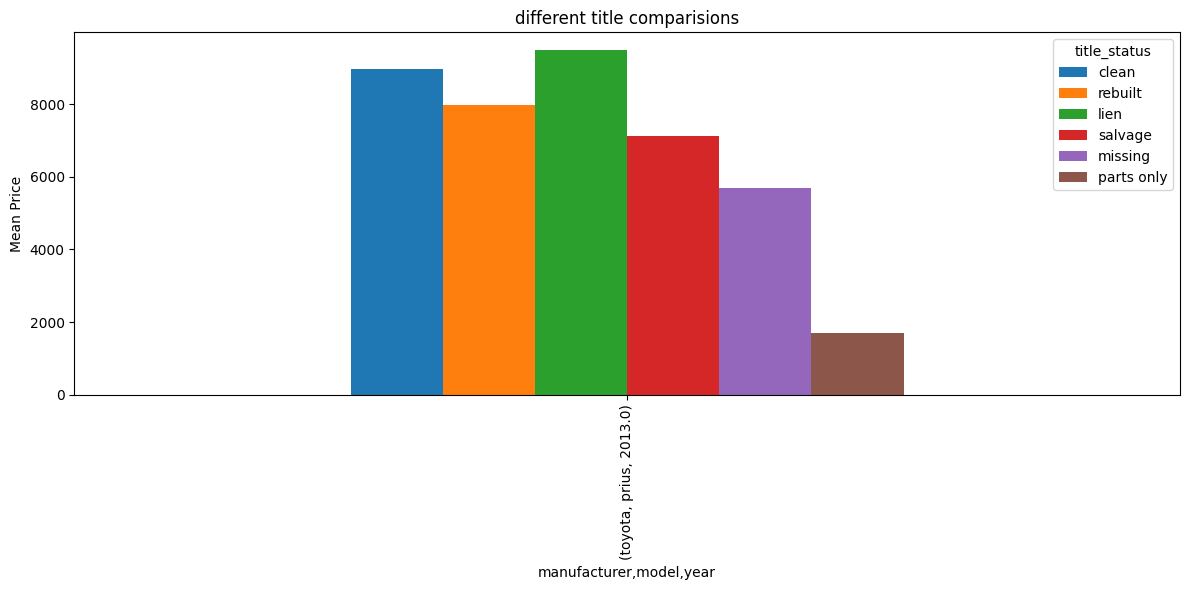

<Figure size 640x480 with 0 Axes>

In [40]:
# Group and pivot
print(pd.unique(df['title_status'].dropna()))
df_grouped = df.groupby(['manufacturer', 'model', 'year', 'title_status'])['price'].mean().reset_index()

# Pivot so each title_status becomes a column
df_pivot = df_grouped.pivot_table(
    index=['manufacturer', 'model', 'year'],
    columns='title_status',
    values='price'
)


# Drop rows with only one non-null value
df_comparable = df_pivot.dropna(thresh=2)

# Display some comparable entries
print(df_comparable.head(10))

subset = df_comparable[pd.unique(df['title_status'].dropna())].dropna()
print(subset.shape)
subset.sample(min(10, len(subset))).plot(
    kind='bar', figsize=(12, 6), title='different title comparisions'
)
plt.ylabel('Mean Price')
plt.tight_layout()
plt.savefig('images/title_layout.png')

# in this section, I am trying to understand the impact of title_status to the price of the car given the same manufacturer / year /model, however I feel I can see a lot of NAN value for this columns
# from the datasets and it results the comparable subsets after filtering only to 1 group. This would be a nice try, but from the largely missing values from this column, it could not be used for building our model.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [6]:
# firstly I want to drop some parameters that won't quite affect the final price, which are the id/region/VIN/size columns. Those columns I believe have low correlation with price.
df_filtered = df.drop(columns=['id', 'region', 'VIN', 'size'])
# secondly I am thinking I probably would use the numeric parameters to train, so I need to remove all the na values
df_filtered_2 = df_filtered.dropna(subset=['year','odometer','price'])
# in order to scale the values and save calculation, we can transfer price to its log.
df_filtered_2['log_price'] = np.log(df_filtered_2['price'])
# during the fit process we saw there are infinity value for price, so let's limit it to 0<price<200000
df_filtered_3 = df_filtered_2[(df_filtered_2['price'] > 0) & (df_filtered_2['price'] < 200000)]

# define X train/test columns
X = df_filtered_3.drop(columns=['price', 'log_price'])
# define y train/test columns
y = df_filtered_3['log_price']




/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-6-4a44e14e5e29>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_2['log_price'] = np.log(df_filtered_2['price'])


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
# let's have a preprocessor to scale the numeric columns and encode the non-numeric columns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numeric and categorical features
numeric_features = ['year','odometer']
nonnumeric_features = [col for col in df_filtered_2.columns if col not in numeric_features and col not in ['price', 'log_price']]
preprocessor = ColumnTransformer(
    transformers=[
        ("num_scale", StandardScaler(), numeric_features),
        ("one_hot", OneHotEncoder(handle_unknown="ignore"), nonnumeric_features)
    ]
)

In [8]:
# split the data into test/train set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
# process transformation of X sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### linear regression

In [25]:
# we can first try building the model with linear regressor.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
linear_reg = LinearRegression()
pipe_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', linear_reg)
])
pipe_reg.fit(X_train, y_train)

# we are trying to use mean_square error function to extract the MSE for our model
y_pred = pipe_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.9551166753148014


### ridge

In [27]:
# we can also try using ridge regressor along with gridsearchcv to test the model here
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_reg = Ridge()
pipe_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ridge_reg)
])
param_grid_ridge = {
    'regressor__alpha': [0.01, 0.1, 1, 10, 100]
}


search_ridge = GridSearchCV(pipe_ridge, param_grid=param_grid_ridge, cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
search_ridge.fit(X_train, y_train)
print(search_ridge.best_params_)


{'regressor__alpha': 1}


In [28]:
# let's evaluate the ridge model
y_pred =search_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {ridge_mse}")

# from here we can see a slight increase in the performance of ridge model against linear model

Mean Squared Error: 0.9370637475347311


### Lasso

In [ ]:
# now I want to try to use lasso regressor along with gridsearchcv to test a new model
from sklearn.linear_model import Lasso
lasso_reg = Lasso(max_iter=5000)
pipe_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', lasso_reg)
])
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}
search_lasso = GridSearchCV(pipe_lasso, param_grid=param_grid_lasso, cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
search_lasso.fit(X_train_transformed, y_train)
print(search_lasso.best_params_)

In [ ]:
# let's evaluate the lasso model
y_pred =search_ridge.predict(X_test_transformed)
lasso_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {lasso_mse}")


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [13]:
# from the above tests, we noticed that ridge regressor performs better than linear regressor, while I failed training Lasso regressor since
# that it seems to take forever probably beacause some of the parameters have high cardinality. In this case, we would take the ridge regressor
# for further evaluation

In [34]:
# now our goal is to extract the most significant parameters from the overall columns
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(nonnumeric_features)
print(cat_features)
all_feature_names = np.concatenate([numeric_features, cat_features])
ridge_best = search_ridge.best_estimator_
preprocessor = ridge_best.named_steps['preprocessor']
ridge_model = ridge_best.named_steps['regressor']
num_features = preprocessor.transformers_[0][2]
cat_encoder = preprocessor.transformers_[1][1]
cat_features = cat_encoder.get_feature_names_out(preprocessor.transformers_[1][2])
all_feature_nams = np.concatenate([num_features, cat_features])
coefficients = ridge_model.coef_
df_coef = pd.DataFrame({
    'feature': all_feature_names,
    'abs_coef': np.abs(coefficients)
})
df_coef_sorted = df_coef.sort_values(by='abs_coef', ascending=False)

# Show top 10 most significant features
print(df_coef_sorted.head(10))

['manufacturer_acura' 'manufacturer_alfa-romeo'
 'manufacturer_aston-martin' ... 'state_wi' 'state_wv' 'state_wy']
                              feature  abs_coef
3432                        model_ANY  8.699339
3499                      model_Autos  7.968765
4805  model_Late Models with Warranty  7.833241
9927                model_cts-v coupe  7.445304
4610                      model_Isuzu  6.613538
8249                        model_car  6.491041
2192                       model_316i  6.392519
3055                      model_560sl  6.325171
4288              model_HANDICAP VANS  6.166995
744       model_1971 DeTomaso Pantera  6.036952


In [39]:
# we seem extracting a mess of those coefficients since these columns are applied with one hot encoding, so we might investigate numeric feature
# importance here

num_feature_names = preprocessor.transformers_[0][2]
num_coefficients = ridge_model.coef_[:len(num_feature_names)]

numeric_coef_df = pd.DataFrame({
    "feature": num_feature_names,
    "abs_coef": np.abs(num_coefficients)
})

numeric_coef_df_sorted = numeric_coef_df.sort_values(by='abs_coef', ascending=False)

print(numeric_coef_df_sorted)

# in this way, we see that the production year of the used car matter much more than odometer, but we also see a good corelation
# of the odometer against the price.


    feature  abs_coef
0      year  0.315125
1  odometer  0.077365


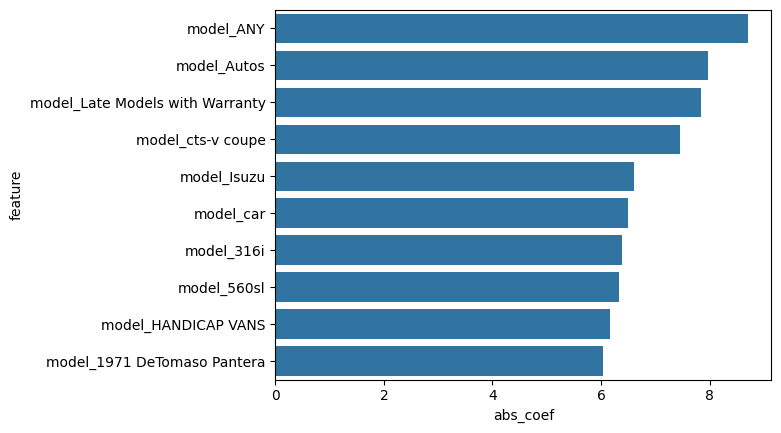

In [42]:
#let's try to plot the all feature top columns
df_top_feat = df_coef_sorted.head(10)
sns.barplot(data=df_top_feat,x='abs_coef',y='feature')
plt.savefig('images/top_cols.png')

# though I cannot know the exact rank of the columns, but from those columns we can deduct it's the manufacter and model of the used car that
# matter to the price most

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
# Based on our data processing and modeling, we can conclude that the key factor that drives the price of
# the car would be year / odometer / manufacturer / model. From the single graph, if given sufficient data,
# I would also expect the title_status to be considered one of the factors as well, the cleaner the title,
# the higher the price is supposed to be. In conclusion, to select a car of its best worthiness, firstly we
# need to choose the right model with relatively latest year, then the latter consideration would be left with
# odometers.